In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import os
import joblib
import warnings

In [10]:
data = pd.read_csv("..//data//GOOGL.csv",index_col="Date",parse_dates=True)
print(data.head())

                                Open       High        Low      Close  \
Date                                                                    
2006-01-27 05:00:00+00:00  10.873407  10.953894  10.722929  10.668937   
2006-01-30 05:00:00+00:00  10.729178  10.830414  10.623444  10.814915   
2006-01-31 05:00:00+00:00  10.762673  10.988390  10.597698  10.043029   
2006-02-01 05:00:00+00:00   9.724325  10.048527   9.686581   9.899549   
2006-02-02 05:00:00+00:00  10.094021  10.161011   9.898048   9.537352   

                               Volume  Day  DayOfWeek  Quarter  Month  Year  \
Date                                                                          
2006-01-27 05:00:00+00:00   337749912   27          4        1      1  2006   
2006-01-30 05:00:00+00:00   343212444   30          0        1      1  2006   
2006-01-31 05:00:00+00:00   881757360   31          1        1      1  2006   
2006-02-01 05:00:00+00:00  1083815100    1          2        1      2  2006   
2006-02-02 05:

Epoch 1/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0019
Epoch 2/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 8.0904e-05
Epoch 3/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 6.9597e-05
Epoch 4/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 6.0784e-05
Epoch 5/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 5.2886e-05
Epoch 6/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 5.5601e-05
Epoch 7/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 4.5969e-05
Epoch 8/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 5.7663e-05
Epoch 9/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 3.8972e-05
Epoch 10/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 6.3186e-05
Epoch 11/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 5.1960e-05
Epoch 12/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 4.7715e-05
Epoch 13/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 4.5769e-05
Epoch 14/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 4.

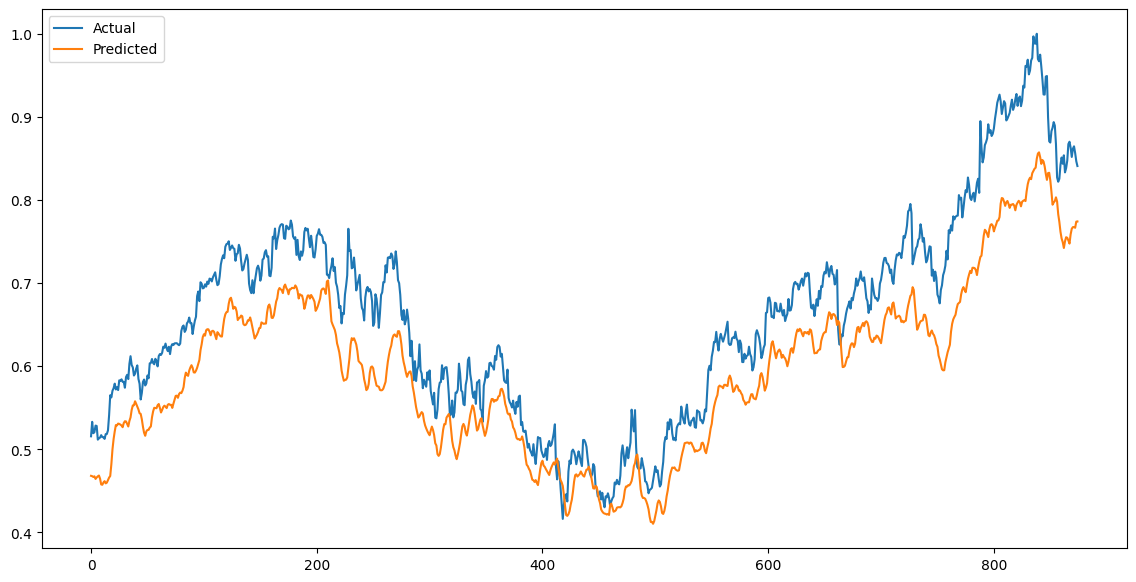

In [13]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
datetime_cols = df.select_dtypes(include=['datetime64']).columns

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[numeric_cols])

# Split the data into training and testing sets
train_size = int(0.8 * len(scaled_data))
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Split the data into input (X) and output (y)
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, 3])  # Use the 'Close' column as the output
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the data for the LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, test_predict)
print('MSE: ', mse)

# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.legend()
plt.show()

In [15]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
datetime_cols = df.select_dtypes(include=['datetime64']).columns

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[numeric_cols])

# Split the data into training and testing sets
train_data = scaled_data[df.index <= '2024-06-30']
test_data = scaled_data[df.index > '2024-06-30']

# Split the data into input (X) and output (y)
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, 3])  # Use the 'Close' column as the output
    if len(X) < time_step:
        X = [data[:time_step, :]]  # Pad with zeros if necessary
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the data for the LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, test_predict)
print('MSE: ', mse)

# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.legend()
plt.show()

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.0143
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 2.6575e-04
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 2.4502e-04
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 1.9550e-04
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 1.9906e-04
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 1.6697e-04
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 1.7450e-04
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 1.7272e-04
Epoch 9/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 1.8234e-04
Epoch 10/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 2.0534e-04
Epoch 11/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 1.4715e-04
Epoch 12/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 1.5088e-04
Epoch 13/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 1.3656e-04
Epoch 14/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 1.

ValueError: Found input variables with inconsistent numbers of samples: [0, 1]